geochecking Debby's station, with fixed lats, lons

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
whos

Interactive namespace is empty.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from oct2py import octave
import seawater as sw
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from matplotlib import reload
plt.style.use('seaborn')
import netCDF4 as nc
import numpy as np
import cmocean
import Ddp_withdat as Ddp
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools,
)

from salishsea_tools import teos_tools
%matplotlib inline

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [5]:
reload(Ddp)

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'Ddp_withdat' from '/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/APRIL_EXP/Ddp_withdat.py'>

In [6]:
#============================================================================#
#                              LOAD DATA                                     #
#============================================================================#
infil = np.loadtxt('../DATASETS/2016_05.txt')

crid = infil[:,0]
ln = infil[:,2]
stn = infil[:,3]
lat = infil[:,6]
lon = infil[:,7]
P = infil[:,8]
T = infil[:,9]
S = infil[:,10]
ox = infil[:,11]
ox_qf = infil[:,12]
dic = infil[:,13]
alk = infil[:,15]
dic_qf = infil[:,14]
alk_qf = infil[:,16]
no3 = infil[:,17]
no3_qf = infil[:,18]
si = infil[:,19]
si_qf = infil[:,20]
po4 = infil[:,21]
po4_qf = infil[:,22]
pH_obs = infil[:,23]
pH_obs_qf = infil[:,24]

In [7]:
S = teos_tools.psu_teos(S)


In [8]:
st_42 = (stn == 42)
st_12 = (stn == 12)
st_27 = (stn == 27)

### stn 42
    423, 263
    Stn 42, real-life lon, lat:
    -123.44, 49.03
    Closest model point lon, lat:
    -123.439, 49.0321
    Distance between them
    0.259142955895
    
###  stn 12
    647, 168
    Stn 12, real-life lon, lat:
    -124.68, 49.73
    Closest model point lon, lat:
    -124.68, 49.7304
    Distance between them
    0.052274032372

### stn 27
    505, 246
    Stn 27, real-life lon, lat:
    -123.8, 49.32
    Closest model point lon, lat:
    -123.801, 49.3217
    Distance between them
    0.215374933011


In [9]:
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')

nav_lon = mesh.variables['nav_lon'][:]
nav_lat = mesh.variables['nav_lat'][:]
bathy = mesh.variables['Bathymetry'][:]
    

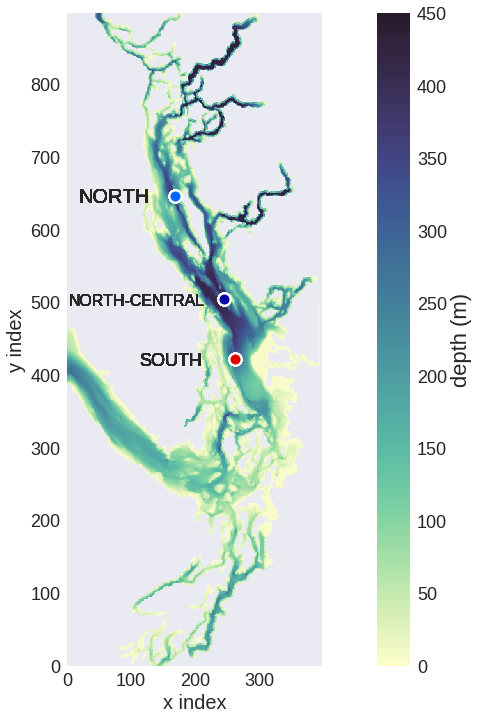

In [36]:
pts_all = len(dic)

fig, ax1 = plt.subplots(1, 1, figsize=(20, 12))
viz_tools.set_aspect(ax1)
mesh = ax1.pcolormesh(bathy, cmap=cmocean.cm.deep, vmin = 0, vmax = 450)
for w in range(0,pts_all):
    if (stn[w] == 12):
        j, i = geo_tools.find_closest_model_point(lon[w],lat[w],nav_lon,nav_lat)
        ax1.plot(i,j,marker ='o', color = 'xkcd:bright blue',markersize=12, markeredgecolor='w', markeredgewidth=2.0)
        ax1.text(i-150,j-10,'NORTH',fontsize = 20)
    if (stn[w] == 27):
        j, i = geo_tools.find_closest_model_point(lon[w],lat[w],nav_lon,nav_lat)
        ax1.plot(i,j,marker ='o', color = 'xkcd:royal blue',markersize=12, markeredgecolor='w', markeredgewidth=2.0)
        ax1.text(i-243,j-10,'NORTH-CENTRAL',fontsize = 16)
    if (stn[w] == 42):
        j, i = geo_tools.find_closest_model_point(lon[w],lat[w],nav_lon,nav_lat)
        ax1.plot(i,j,marker ='o', markeredgecolor='w', markerfacecolor = 'xkcd:red',markersize=12,  markeredgewidth=2.0)
        ax1.text(i-150,j-10,'SOUTH',fontsize = 18)


    #cbar.ax.set_xticklabels(cbar.ax.get_xticklabels(), size=18)
cbar = fig.colorbar(mesh)
cbar.set_label(label='depth (m)', size=22)
cbar.ax.tick_params(labelsize=18) 
ax1.set_xlabel('x index', fontsize = 20)
ax1.set_ylabel('y index', fontsize = 20)
ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)
#plt.suptitle('Stations for comparison',fontsize=20)



In [11]:
# st_42 = (stn == 42)
# st_12 = (stn == 12)
# st_27 = (stn == 27)

depth = P[st_27]
DIC_prof = dic[st_27]
OXY_prof = ox[st_27]
sn_prof = S[st_27]
#print(depth)

In [12]:
def dicoxysal_prof(depth,DIC_prof,OXY_prof,sn_prof,dirstr,tit1,figtit):
    
    dend = 30
    # Three-panel plot
    fig, (ax2, ax3, ax4) = plt.subplots(figsize=(14.0, 9.0) , nrows=1, ncols=3, sharey=True)
    # Temperature
    ax2.plot(sn_prof[0:dend],depth[0:dend],'o')
    ax2.set_ylabel('Depth (m)', fontsize = 14)
    ax2.set_ylim([0,255])
    ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
    ax2.set_xlabel('Salinity', fontsize = 14)
    #ax2.xaxis.set_label_position('top') # this moves the label to the top
    #ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
    # Salinity
    ax3.plot(DIC_prof[0:dend],depth[0:dend],'or')
    ax3.set_xlabel('DIC μmol/kg', fontsize = 14)
    #ax3.xaxis.set_label_position('top') # this moves the label to the top
    #ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
    ax3.yaxis.set_visible(True) # This erases the y ticks
    # Fluorescence
    ax4.plot(OXY_prof[0:dend],depth[0:dend],'og')
    ax4.set_xlabel('oxygen ml/l', fontsize = 14)
    #ax4.xaxis.set_label_position('top') # this moves the label to the top
    #ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
    ax4.yaxis.set_visible(True) # This erases the y ticks

    fig.suptitle(tit1, fontsize = 18)
    
    

    total_fig = dirstr+figtit+ '.png'
    #fig.savefig(total_fig)
    #plt.close(fig)
    plt.show()

In [45]:
print(dic[st_42])
print('**')
dic_n42 = dic[st_42]*(32/(S[st_42]))
print(dic_n42)


dic_n27 = dic[st_27]*(32/(S[st_27]))
dic_n12 = dic[st_12]*(32/(S[st_12]))

[ 1469.43  1685.24  1878.39  1976.83  1967.94  1970.38  1975.68  1984.2
  1996.46  2019.78  2020.9       nan  2113.8   2121.97      nan  2135.93]
**
[ 2513.61903882  2119.34696934  2126.78183475  2189.13350538  2161.99937559
  2145.51239128  2144.83064495  2131.12571258  2132.49985265  2144.82106758
  2127.14531452            nan  2180.89205821  2183.02757909            nan
  2192.50271468]


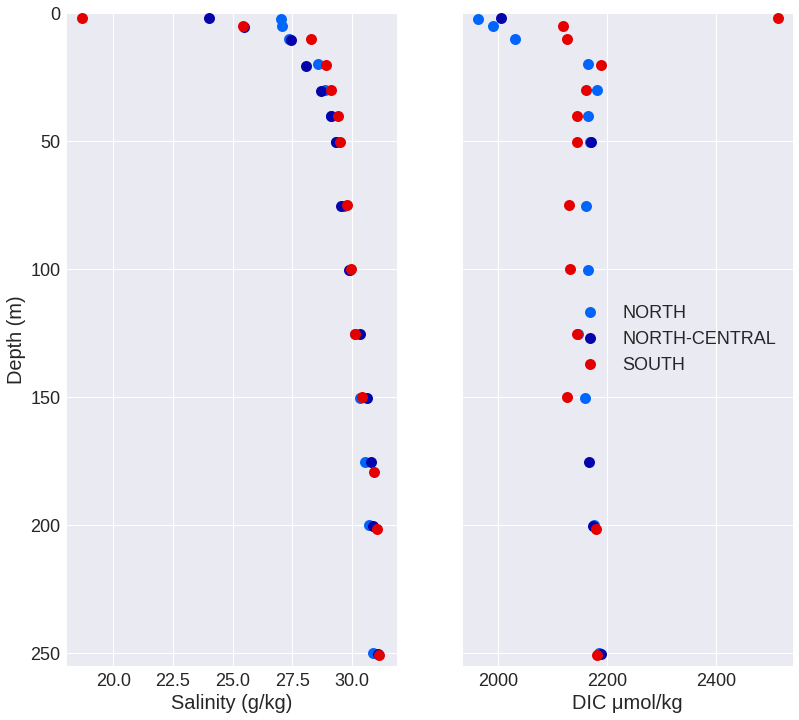

In [46]:
dend = 30
# Three-panel plot
fig, (ax2, ax3) = plt.subplots(figsize=(13, 12.0) , nrows=1, ncols=2, sharey=True)
# Temperature
 
ax2.plot(S[st_12],P[st_12],linestyle='', marker ='o', color = 'xkcd:bright blue', markersize = 11)
ax2.plot(S[st_27],P[st_27],linestyle='', marker ='o', color = 'xkcd:royal blue', markersize = 11)
ax2.plot(S[st_42],P[st_42],linestyle='', marker ='o', color = 'xkcd:red', markersize = 11)   
ax2.set_ylabel('Depth (m)', fontsize = 20)
ax2.set_ylim([0,255])
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Salinity (g/kg)', fontsize = 20)
#ax2.xaxis.set_label_position('top') # this moves the label to the top
#ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
# Salinity

ax3.plot(dic_n12,P[st_12], linestyle='', marker ='o', color = 'xkcd:bright blue', markersize = 11)
ax3.plot(dic_n27,P[st_27], linestyle='', marker ='o', color = 'xkcd:royal blue', markersize = 11)
ax3.plot(dic_n42,P[st_42], linestyle='', marker ='o', color = 'xkcd:red', markersize = 11)
ax3.set_xlabel('DIC μmol/kg', fontsize = 20)
#ax3.xaxis.set_label_position('top') # this moves the label to the top
#ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax3.yaxis.set_visible(True) # This erases the y ticks
# Fluorescence
ax3.legend(['NORTH','NORTH-CENTRAL','SOUTH'], fontsize = 18)
ax3.xaxis.set_tick_params(labelsize=18)
ax3.yaxis.set_tick_params(labelsize=18)
ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
# 
#fig.suptitle('Depth profiles, April 2016', fontsize = 25)

plt.show()

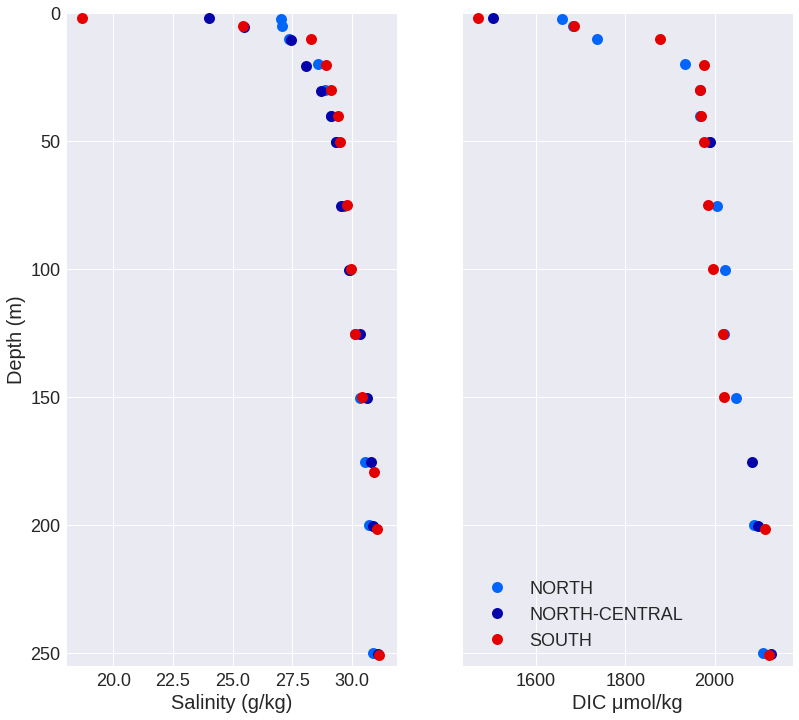

In [41]:
dend = 30
# Three-panel plot
fig, (ax2, ax3) = plt.subplots(figsize=(13, 12.0) , nrows=1, ncols=2, sharey=True)
# Temperature
 
ax2.plot(S[st_12],P[st_12],linestyle='', marker ='o', color = 'xkcd:bright blue', markersize = 11)
ax2.plot(S[st_27],P[st_27],linestyle='', marker ='o', color = 'xkcd:royal blue', markersize = 11)
ax2.plot(S[st_42],P[st_42],linestyle='', marker ='o', color = 'xkcd:red', markersize = 11)   
ax2.set_ylabel('Depth (m)', fontsize = 20)
ax2.set_ylim([0,255])
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Salinity (g/kg)', fontsize = 20)
#ax2.xaxis.set_label_position('top') # this moves the label to the top
#ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
# Salinity

ax3.plot(dic[st_12],P[st_12], linestyle='', marker ='o', color = 'xkcd:bright blue', markersize = 11)
ax3.plot(dic[st_27],P[st_27], linestyle='', marker ='o', color = 'xkcd:royal blue', markersize = 11)
ax3.plot(dic[st_42],P[st_42], linestyle='', marker ='o', color = 'xkcd:red', markersize = 11)
ax3.set_xlabel('DIC μmol/kg', fontsize = 20)
#ax3.xaxis.set_label_position('top') # this moves the label to the top
#ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax3.yaxis.set_visible(True) # This erases the y ticks
# Fluorescence
ax3.legend(['NORTH','NORTH-CENTRAL','SOUTH'], fontsize = 18)
ax3.xaxis.set_tick_params(labelsize=18)
ax3.yaxis.set_tick_params(labelsize=18)
ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
# 
#fig.suptitle('Depth profiles, April 2016', fontsize = 25)

plt.show()

In [1]:
dend = 30
# Three-panel plot
fig, (ax2, ax3) = plt.subplots(figsize=(13, 12.0) , nrows=1, ncols=2, sharey=True)
# Temperature
 
ax2.plot(S[st_12],P[st_12],linestyle='', marker ='o', color = 'xkcd:bright blue', markersize = 11)
ax2.plot(S[st_27],P[st_27],linestyle='', marker ='o', color = 'xkcd:royal blue', markersize = 11)
ax2.plot(S[st_42],P[st_42],linestyle='', marker ='o', color = 'xkcd:red', markersize = 11)   
ax2.set_ylabel('Depth (m)', fontsize = 20)
ax2.set_ylim([20,150])
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Salinity (g/kg)', fontsize = 20)
#ax2.xaxis.set_label_position('top') # this moves the label to the top
#ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
# Salinity

ax3.plot(dic_n12,P[st_12], linestyle='', marker ='o', color = 'xkcd:bright blue', markersize = 11)
ax3.plot(dic_n27,P[st_27], linestyle='', marker ='o', color = 'xkcd:royal blue', markersize = 11)
ax3.plot(dic_n42,P[st_42], linestyle='', marker ='o', color = 'xkcd:red', markersize = 11)
ax3.set_xlabel('DIC μmol/kg', fontsize = 20)
ax3.set_xlim([2100,2200])
#ax3.xaxis.set_label_position('top') # this moves the label to the top
#ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax3.yaxis.set_visible(True) # This erases the y ticks
# Fluorescence
ax3.legend(['NORTH','NORTH-CENTRAL','SOUTH'], fontsize = 18)
ax3.xaxis.set_tick_params(labelsize=18)
ax3.yaxis.set_tick_params(labelsize=18)
ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
#fig.suptitle('Depth profiles, April 2016', fontsize = 25)

plt.show()

NameError: name 'plt' is not defined

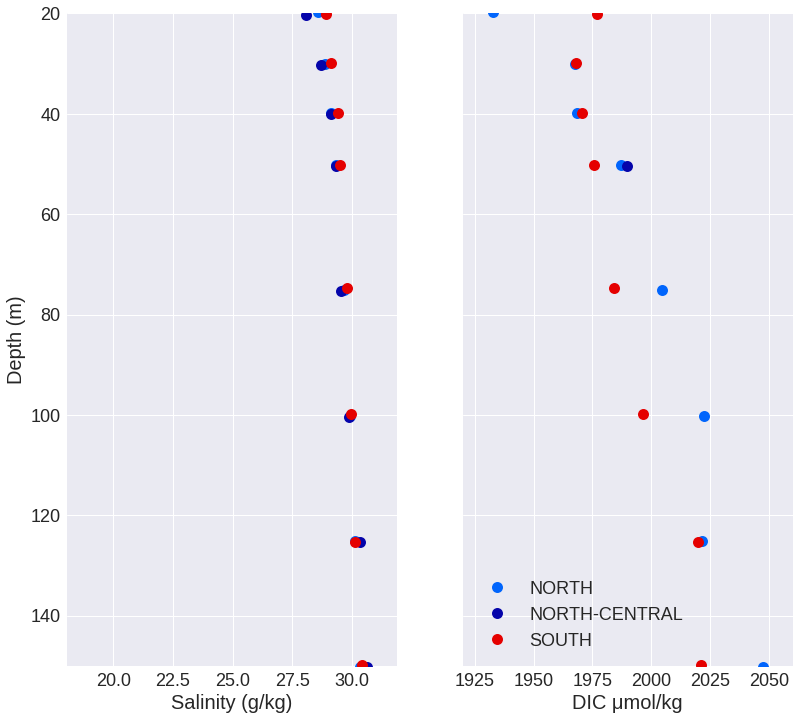

In [40]:
dend = 30
# Three-panel plot
fig, (ax2, ax3) = plt.subplots(figsize=(13, 12.0) , nrows=1, ncols=2, sharey=True)
# Temperature
 
ax2.plot(S[st_12],P[st_12],linestyle='', marker ='o', color = 'xkcd:bright blue', markersize = 11)
ax2.plot(S[st_27],P[st_27],linestyle='', marker ='o', color = 'xkcd:royal blue', markersize = 11)
ax2.plot(S[st_42],P[st_42],linestyle='', marker ='o', color = 'xkcd:red', markersize = 11)   
ax2.set_ylabel('Depth (m)', fontsize = 20)
ax2.set_ylim([20,150])
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Salinity (g/kg)', fontsize = 20)
#ax2.xaxis.set_label_position('top') # this moves the label to the top
#ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
# Salinity

ax3.plot(dic[st_12],P[st_12], linestyle='', marker ='o', color = 'xkcd:bright blue', markersize = 11)
ax3.plot(dic[st_27],P[st_27], linestyle='', marker ='o', color = 'xkcd:royal blue', markersize = 11)
ax3.plot(dic[st_42],P[st_42], linestyle='', marker ='o', color = 'xkcd:red', markersize = 11)
ax3.set_xlabel('DIC μmol/kg', fontsize = 20)
ax3.set_xlim([1920,2060])
#ax3.xaxis.set_label_position('top') # this moves the label to the top
#ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax3.yaxis.set_visible(True) # This erases the y ticks
# Fluorescence
ax3.legend(['NORTH','NORTH-CENTRAL','SOUTH'], fontsize = 18)
ax3.xaxis.set_tick_params(labelsize=18)
ax3.yaxis.set_tick_params(labelsize=18)
ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
#fig.suptitle('Depth profiles, April 2016', fontsize = 25)

plt.show()

<img src="./APRIL_PROFILES/fig_prof3_april-1.png" alt="Drawing" style="width: 700px;">

NameError: name 'S_teos' is not defined

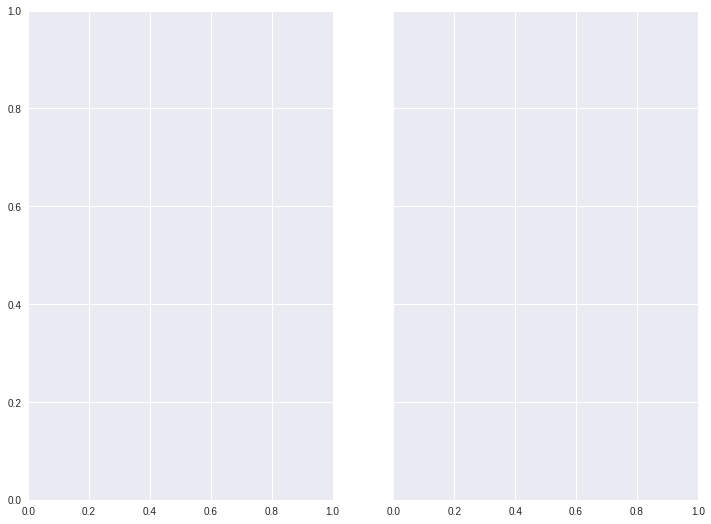

In [15]:
dend = 30
# Three-panel plot
fig, (ax2, ax3) = plt.subplots(figsize=(12.0, 9.0) , nrows=1, ncols=2, sharey=True)
# Temperature
ax2.plot(S_teos[st_27],P[st_27],'ob')
ax2.plot(S_teos[st_12],P[st_12],'ob')
ax2.plot(S_teos[st_42],P[st_42],'or')
ax2.set_ylabel('Depth (m)', fontsize = 14)
ax2.set_ylim([0,355])
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Salinity', fontsize = 14)
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
# Salinity
ax3.plot(dic[st_27],P[st_27],'ob')
ax3.plot(dic[st_12],P[st_12],'ob')
ax3.plot(dic[st_42],P[st_42],'or')
ax3.set_xlabel('DIC μmol/kg', fontsize = 14)
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax3.yaxis.set_visible(True) # This erases the y ticks

fig.suptitle('Comparing N and S stations, Debby (no oxygen)', fontsize = 18)



#total_fig = dirstr+figtit+ '.png'
#fig.savefig(total_fig)
#plt.close(fig)
plt.show()

In [53]:
reload(Ddp)
dirstr = './PP9/'
figtit = 'DPss_day_'
resdir = 'may10_a7/'
segment = 7
Ddp.MRAP_day(resdir,dirstr,figtit,segment)
resdir = 'may10_a8/'
segment = 8
Ddp.MRAP_day(resdir,dirstr,figtit,segment)

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


index
90
/data/tjarniko/results/may10_a7/
number of frames
(15,)
no look I pass it the right effing t
0
t is
0
March 31, 2016, (90 days since January 1, 2016)
no look I pass it the right effing t
1
t is
1
April 1, 2016, (91 days since January 1, 2016)
no look I pass it the right effing t
2
t is
2
April 2, 2016, (92 days since January 1, 2016)
no look I pass it the right effing t
3
t is
3
April 3, 2016, (93 days since January 1, 2016)
no look I pass it the right effing t
4
t is
4
April 4, 2016, (94 days since January 1, 2016)
no look I pass it the right effing t
5
t is
5
April 5, 2016, (95 days since January 1, 2016)
no look I pass it the right effing t
6
t is
6
April 6, 2016, (96 days since January 1, 2016)
no look I pass it the right effing t
7
t is
7
April 7, 2016, (97 days since January 1, 2016)
no look I pass it the right effing t
8
t is
8
April 8, 2016, (98 days since January 1, 2016)
no look I pass it the right effing t
9
t is
9
April 9, 2016, (99 days since January 1, 2016)
no l

In [ ]:
from IPython.display import HTML
HTML("""
<video width="960" height="720" controls>
  <source src="./STN3MOV/movie_DP_day_.mp4" type="video/mp4">
</video>
""")

In [ ]:
from IPython.display import HTML
HTML("""
<video width="960" height="720" controls>
  <source src="./DIC3/movie_DIC_day_.mp4" type="video/mp4">
</video>
""")

In [ ]:
# 